In [23]:
abs_path = r'C:\Users\Assel\Desktop\For_machine_learning_dataset_2.csv'
from pandas import read_csv
df = read_csv(abs_path)
df.head

<bound method NDFrame.head of      baseline  normalisation      gain  mutant
0      608.25         422.00  0.733921       1
1      336.25         388.50  1.065835       1
2      381.00         432.50  1.189593       1
3      322.75         206.25  0.642242       1
4      451.50         866.75  2.260258       1
5      183.00         951.75  2.341137       1
6      452.50         475.25  0.954952       1
7      274.25         176.00  0.523012       1
8      306.50         784.75  2.098301       1
9      374.00         209.75  0.292934       1
10     483.00         298.50  0.582757       1
11     494.50         577.25       NaN       1
12     404.00         657.75  1.263665       1
13     508.25         311.75  0.491592       1
14     372.25         302.75  0.822864       1
15     659.50         192.50  0.200668       1
16     273.75         330.50  0.323868       1
17     238.25         283.50  0.604439       1
18     608.25         296.25  0.413630       1
19     526.50         394.25  

In [24]:
#splitting into features and labels
from numpy import reshape
X = df.iloc[:,0:2].values
y = df.iloc[:,3].values

In [25]:
#splitting into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
X_train = tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

In [27]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58904198, 0.41095802])

In [45]:
#lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [40]:
#fit logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
#fit logistic regression to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [49]:

#to obtain the success of pca, divide the sum of accurate predictions in the confusion matrix by the overall sum in y_test
#the score for this is 46%
X_train.shape;
cm

array([[20,  5,  9],
       [17,  7, 13],
       [19,  9, 13]], dtype=int64)

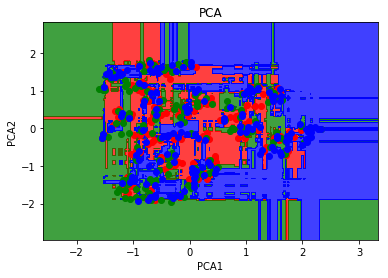

In [50]:
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() +1, step = 0.01),
               np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green', 'blue'))(i),label = j)
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()